<a href="https://colab.research.google.com/github/tsulcap/Ejem1/blob/main/20_11_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SciPy

![SciPy](https://scipy.org/images/logo.svg)

Se basa en el marco NumPy de bajo nivel para matrices multidimensionales y proporciona una gran cantidad de algoritmos científicos de nivel superior. Algunos de sus submódulos son:

- Special functions (`scipy.special`)
- Integration (`scipy.integrate`)
- Optimization (`scipy.optimize`)
- Interpolation (`scipy.interpolate`)
- Fourier Transforms (`scipy.fftpack`)
- Signal Processing (`scipy.signal`)
- Linear Algebra (`scipy.linalg`)
- Sparse Eigenvalue Problems (`scipy.sparse`)
- Statistics (`scipy.stats`)
- Multi-dimensional image processing (`scipy.ndimage`)
- File IO (`scipy.io`)

In [ ]:
# Checking for scipy
import scipy

In [ ]:
print(scipy.__version__)

1.7.3


Correr las pruebas para revisar la correcta instalación podría tomar algunos minutos.

In [ ]:
scipy.test()

============================= test session starts ==============================
platform linux -- Python 3.7.15, pytest-3.6.4, py-1.11.0, pluggy-0.7.1
rootdir: /content, inifile:
plugins: typeguard-2.7.1
collected 45873 items / 11134 deselected

scipy/_build_utils/tests/test_scipy_version.py .                         [  0%]
scipy/_lib/tests/test__gcutils.py ......                                 [  0%]
scipy/_lib/tests/test__pep440.py .........                               [  0%]
scipy/_lib/tests/test__testutils.py ..                                   [  0%]
scipy/_lib/tests/test__threadsafety.py ..                                [  0%]
scipy/_lib/tests/test__util.py ......FFFFFF..........                    [  0%]
scipy/_lib/tests/test_bunch.py ............................              [  0%]
scipy/_lib/tests/test_ccallback.py ....                                  [  0%]
scipy/_lib/tests/test_deprecation.py .                                   [  0%]
scipy/_lib/tests/test_import_cycl

False

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [ ]:
n: int = 0
x: float = 0.0
print(f"J_{n}({x}) = {jn(n, x)}")

x: float = 1.0
print(f"Y_{n}({x}) = {yn(n, x)}")

J_0(0.0) = 1.0
Y_0(1.0) = 0.08825696421567697


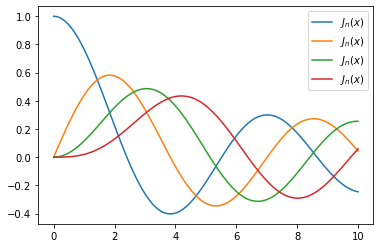

In [ ]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
  ax.plot(x, jn(n, x), label=r"$J_{n}(x)$")
ax.legend()

In [ ]:
# ceros las funciones de Bessel
n: int = 0 # orden
m: int = 4 # número de raíces para calcular
print(jn_zeros(n, m))

[ 2.40482556  5.52007811  8.65372791 11.79153444]


### Cuadraturas

In [ ]:
from scipy.integrate import quad

In [ ]:
f = lambda x: x # def f(x): return x

In [ ]:
x_inferior = 0
x_superior = 1

val, abserr = quad(f, x_inferior, x_superior)

print(f"integral value = {val}")
print(f"absolute error = {abserr}")

integral value = 0.5
absolute error = 5.551115123125783e-15


In [ ]:
integrand = lambda x, n: jn(n, x) # Retorna la función de Bessel de orden n

x_inferior = 0
x_superior = 10

val, abserr = quad(integrand, x_inferior, x_superior, args=(3,))

print(f"integral value = {val}")
print(f"absolute error = {abserr}")

integral value = 0.7366751370811073
absolute error = 9.389126882496403e-13


In [ ]:
val, abserr = quad(lambda x: np.exp(-x ** 2), -np.Inf, np.Inf)

print(f"Solución numérica = {val}, {abserr}")

analytical = np.sqrt(np.pi)
print(f"Solución analítica = {analytical}")

Solución numérica = 1.7724538509055159, 1.4202636780944923e-08
Solución analítica = 1.7724538509055159


In [ ]:
from scipy.integrate import dblquad

In [ ]:
integrand = lambda x, y: np.exp(-x**2-y**2)

x_inferior = 0  
x_superior = 10
y_inferior = 0
y_superior = 10

val, abserr = dblquad(integrand, x_inferior, x_superior, lambda x : y_inferior, lambda x: y_superior)

print(f"Solución numérica = {val}, {abserr}")

Solución numérica = 0.7853981633974476, 1.3753098510218528e-08


## Ecuaciones diferencias ordinarias
Un sistema de EDOs se escriba de la siguiente forma
$$y'=f(y, t)$$

donde
$$y = \left(y_1(t), y_2(t), ..., y_n(t)\right)$$

y $f$ es alguna función que da las derivadas de la función $y_i\left(t\right)$.

Para resolver una EDO necesitamos conocer la función $f$ y una condición inicial, $y\left(0\right)$,

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
F = lambda t, s: np.cos(t)

t = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t)

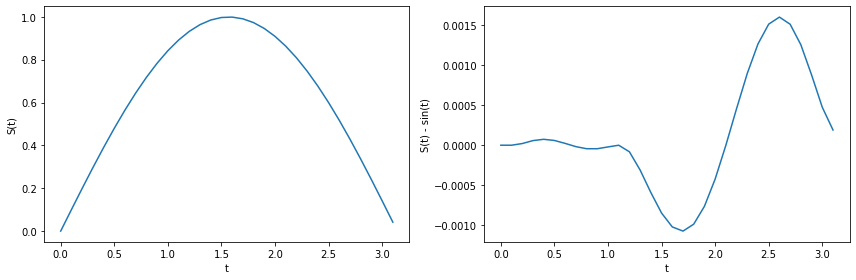

In [ ]:
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

In [ ]:
F = lambda t, s: -s

t = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t)

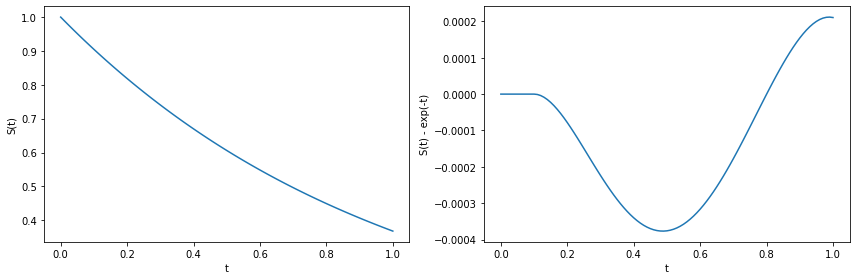

In [ ]:
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

Sea el sistema $S(t)=\left[\begin{array}{c}x(t) \\ y(t)\end{array}\right]$,
y el sistema EDO
$$
\frac{d S(t)}{d t}=\left[\begin{array}{cc}
0 & t \\
-t & 0
\end{array}\right] S(t)
$$
Use solve_ivp para resolver la ODE en $[0,10]$ con la condición inicial $S_0=\left[\begin{array}{l}1 \\ 1\end{array}\right]$.
Grafique la solución de $(x(t), y(t))$.

In [ ]:
F = lambda t, s: np.dot(np.array([[0, t], [-t, 0]]), s)

t = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t)

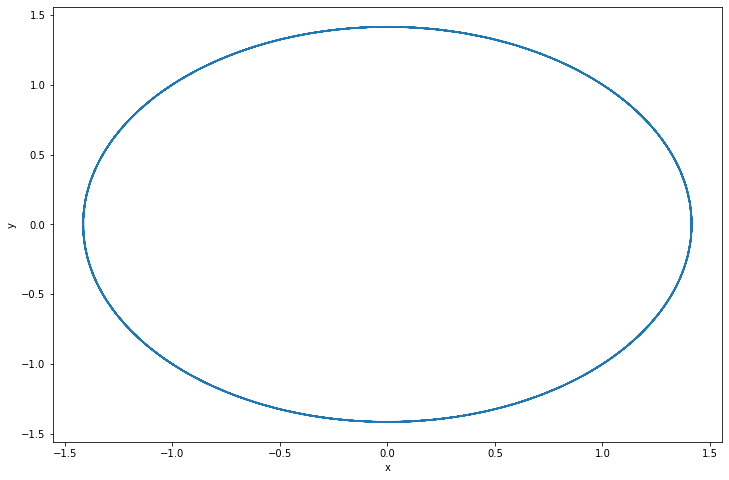

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Regresión lineal por mínimos cuadrados ordinarios

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [ ]:

alpha = curve_fit(lambda x, a, b: a*x+b, xdata = x, ydata = y)[0]
print(alpha)

[1.48719619 0.99894816]


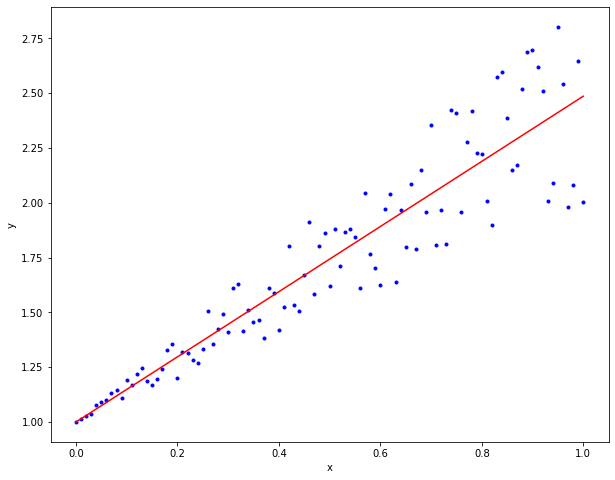

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Búsqueda de ceros de una función


In [ ]:
from scipy.optimize import fsolve

f = lambda x: np.cos(x) - x
cero = fsolve(f, -2)
print(cero)

# Verifación de la solución
resultado = f(cero)
print(resultado)

[0.73908513]
[0.]


## Interpolación

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
x = [0, 1, 2, 3]
y = [1, 2, 4, 1]

f = interp1d(x, y)
y_hat = f(1.5)
print(y_hat)

3.0


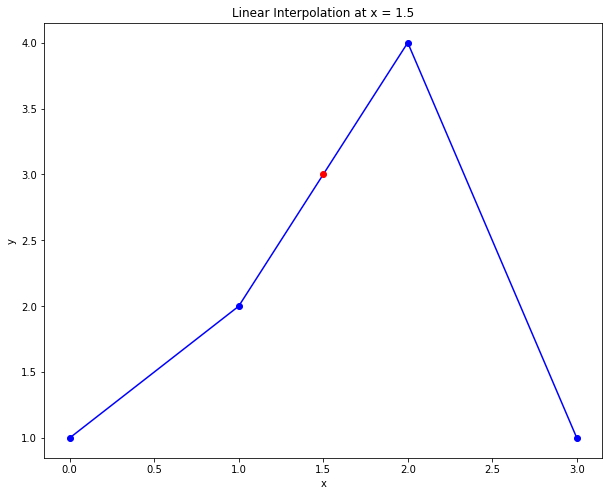

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(1.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
f = lambda x: np.sin(x)

In [ ]:
n = np.arange(0, 10)  
x = np.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n))
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

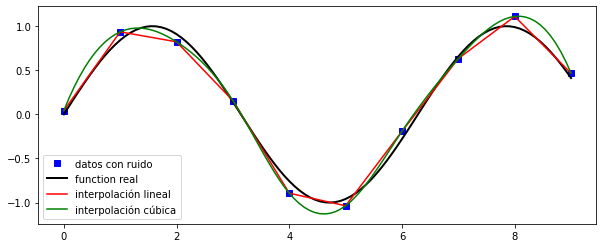

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='datos con ruido')
ax.plot(x, y_real, 'k', lw=2, label='function real')
ax.plot(x, y_interp1, 'r', label='interpolación lineal')
ax.plot(x, y_interp2, 'g', label='interpolación cúbica')
ax.legend(loc=3)

# Sistemas de ecuaciones lineales

In [ ]:
from scipy.linalg import solve

In [ ]:
A = np.array([[1,2,3.2], [4.1,5,6], [7,8,9]])
b = np.array([1,2,3])

In [ ]:
x = solve(A, b)

In [ ]:
x

array([ 1.25 , -2.125,  1.25 ])

In [ ]:
np.dot(A, x) - b

array([0., 0., 0.])

In [ ]:
from scipy.linalg import eigvals, eig

In [ ]:
evals = eigvals(A)

In [ ]:
print(evals)

[ 1.62097572e+01+0.j -1.20154227e+00+0.j -8.21494046e-03+0.j]


In [ ]:
evals, evecs = eig(A)

In [ ]:
print(evals)
print(evecs)

[ 1.62097572e+01+0.j -1.20154227e+00+0.j -8.21494046e-03+0.j]
[[-0.24078376 -0.82108467  0.46144485]
 [-0.52500556 -0.00934167 -0.81036007]
 [-0.81632857  0.57072998  0.36108892]]


### Búsqueda del mínimo

In [ ]:
from scipy.optimize import fmin_bfgs

In [ ]:
f = lambda x: 4*x**3 + (x-2)**2 + x**4

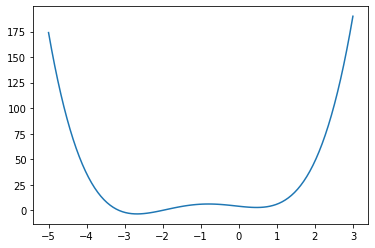

In [ ]:
fig, ax  = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x));

In [ ]:
x_minimo = fmin_bfgs(f, -2)

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


In [ ]:
print(x_minimo)

[-2.67298151]
